# CIS4930: Introduction to Multimodal Machine Learning in Python
## Individual Coding Assignment 03


## Step 1: Split the dataset into training and testing sets. 

In [52]:
# Import libraries   
import os
import shutil
from sklearn.model_selection import train_test_split

# Function for spliting dataset
def split_dataset(emotion):
    
    # Define the path to the directory where the audio files are stored
    path = "./data_folder/" + emotion

    # Get a list of all the audio files in the directory
    audio_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith(".wav")]

    # Split the audio files into training and testing sets
    train_files, test_files = train_test_split(audio_files, test_size=0.3, random_state=42)

    # Create two new directories for the training and testing sets
    train_dir = "./training_data/" + emotion
    test_dir = "./testing_data/" + emotion

    if not os.path.exists(train_dir):
        os.makedirs(train_dir)

    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    # Copy the training set files to the new directory
    for file_path in train_files:
        file_name = os.path.basename(file_path)
        new_path = os.path.join(train_dir, file_name)
        shutil.copy(file_path, new_path)

    # Copy the testing set files to the new directory
    for file_path in test_files:
        file_name = os.path.basename(file_path)
        new_path = os.path.join(test_dir, file_name)
        shutil.copy(file_path, new_path)

# Split audio files for each emotion
split_dataset("angry")
split_dataset("happy")
split_dataset("sad")
split_dataset("fear")

## Step 2: Exploratory Data Analysis.

In [53]:
# Function to check amount of training and testing data for each emotion
def data_amount(emotion):
    
    training_path = "./training_data/" + emotion
    testing_path = "./testing_data/" + emotion
    
    training_num_files = len([f for f in os.listdir(training_path) if os.path.isfile(os.path.join(training_path, f))])
    testing_num_files = len([f for f in os.listdir(testing_path) if os.path.isfile(os.path.join(testing_path, f))])
    
    print("Number training data for " + emotion + " ", training_num_files)
    print("Number testing data for " + emotion + " ", testing_num_files)

# Check data amount for each emotion
data_amount("angry")
data_amount("happy")
data_amount("sad")
data_amount("fear")

Number training data for angry  70
Number testing data for angry  30
Number training data for happy  70
Number testing data for happy  30
Number training data for sad  70
Number testing data for sad  30
Number training data for fear  70
Number testing data for fear  30


In [54]:
# Import random library
import random

# Function to return path of random audio file from training data
def choose_random_audio(emotion):
    
    # Set the path to the directory containing audio files
    dir_path = "./training_data/" + emotion

    # Get a list of all audio files in the directory
    audio_files = [f for f in os.listdir(dir_path) if f.endswith(".wav")]

    # Choose a random audio file from the list
    random_audio_file = random.choice(audio_files)

    # Get the full path to the chosen audio file
    audio_file_path = os.path.join(dir_path, random_audio_file)
    
    # Return path
    return(audio_file_path)

In [55]:
# Import libraries
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Function to plot and display time and frequency domain graphs of a certain audio file
def display_graphs(path):
    
    signal, sample_rate = librosa.load(path)

    # plot audio files in time domain
    plt.figure(1)
    librosa.display.waveshow(y=signal, sr=sample_rate)
    plt.xlabel('Time / second')
    plt.ylabel('Amplitude')
    plt.show()

    # plot audio files in frequency domain
    k = np.arange(len(signal))
    T = len(signal)/sample_rate
    freq = k/T

    DATA_0 = np.fft.fft(signal)
    abs_DATA_0 = abs(DATA_0)
    plt.figure(2)
    plt.plot(freq, abs_DATA_0)
    plt.xlabel("Frequency / Hz")
    plt.ylabel("Amplitude / dB")
    plt.xlim([0, 1000])
    plt.show()

    # plot the time-frequency variation of the audio
    D = librosa.stft(signal)  # STFT of y
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    plt.figure(3)
    librosa.display.specshow(S_db, x_axis='time', y_axis='log')
    plt.colorbar()
    plt.show()

In [56]:
# Import IPython library in order to listen to specific audio files

# Audio could not be played when it was inside a function.
# The problem is that the function call doesn't really play the sound,
# it's actually played by the resulting HTML that is returned to Jupyter output.
# So to overcome this, you can force the function to render the HTML using display( )
# function from IPython.
from IPython.display import Audio, display

# Run the function choose_random_audio for all emotions and then display audio 
print("Angry audio: ")
display(Audio(choose_random_audio("angry")))

print("Happy audio: ")
display(Audio(choose_random_audio("happy")))

print("Sad audio: ")
display(Audio(choose_random_audio("sad")))

print("Fear audio: ")
display(Audio(choose_random_audio("fear")))


Angry audio: 


Happy audio: 


Sad audio: 


Fear audio: 


Angry:


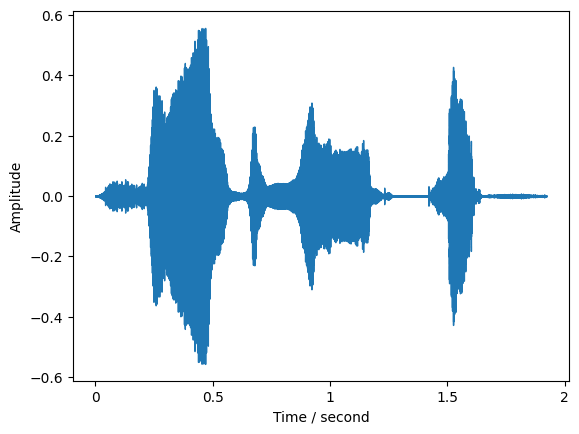

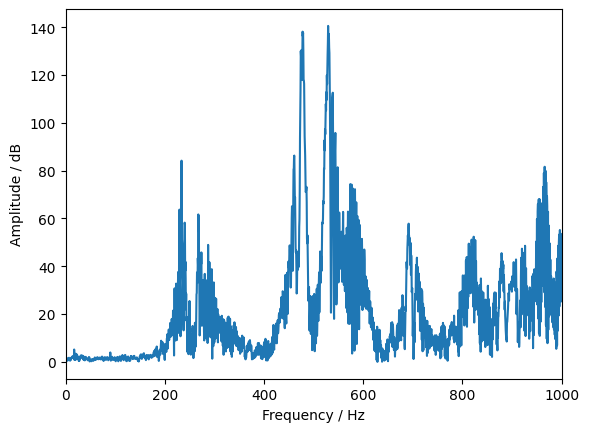

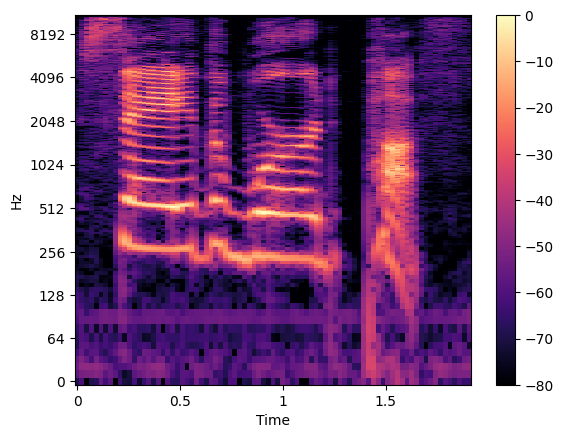

Happy:


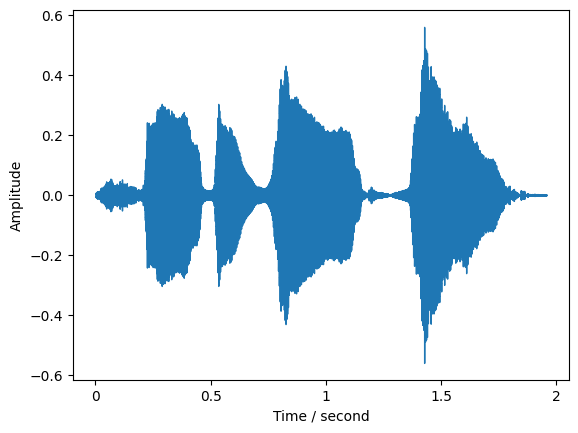

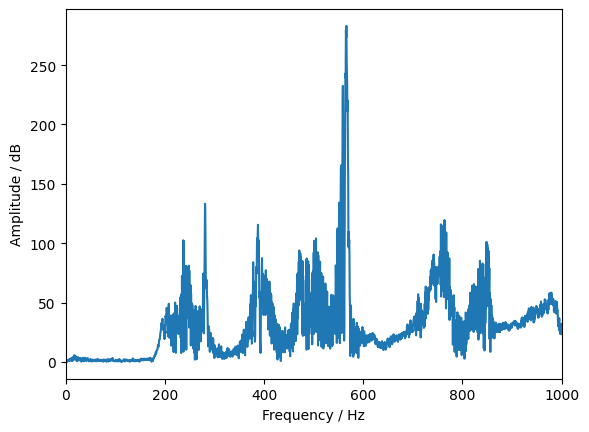

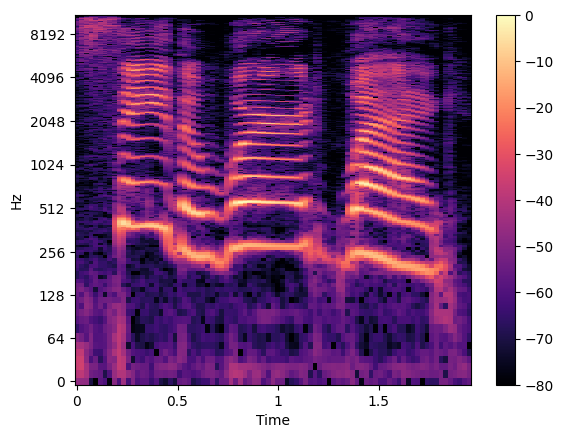

Sad:


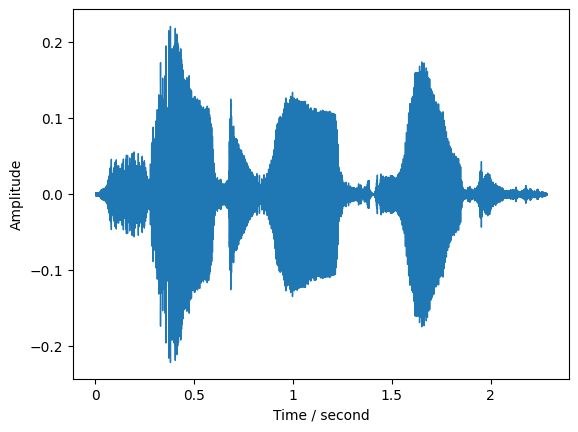

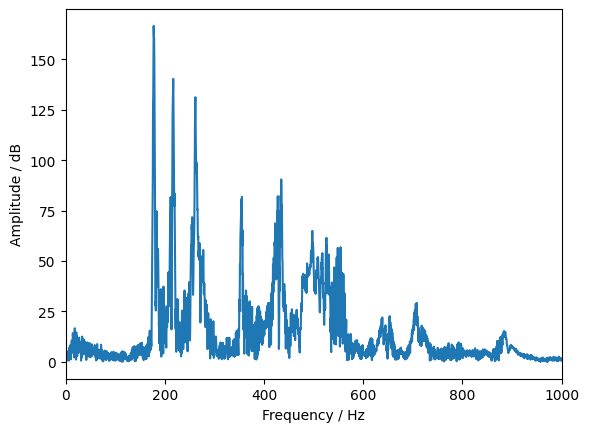

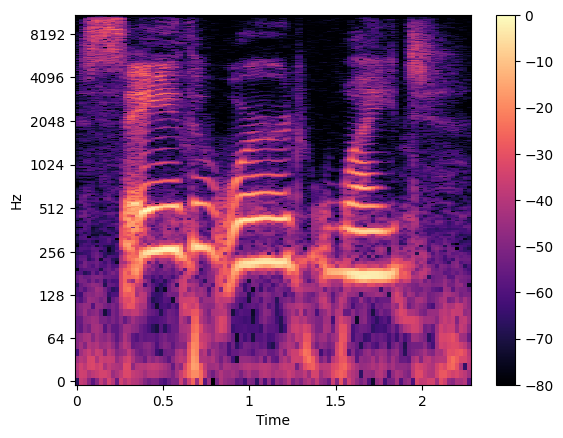

Fear:


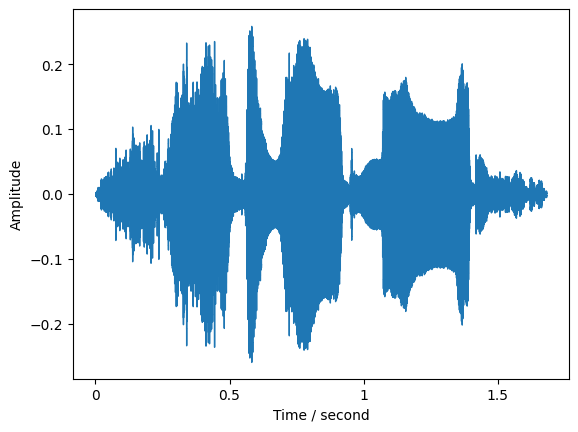

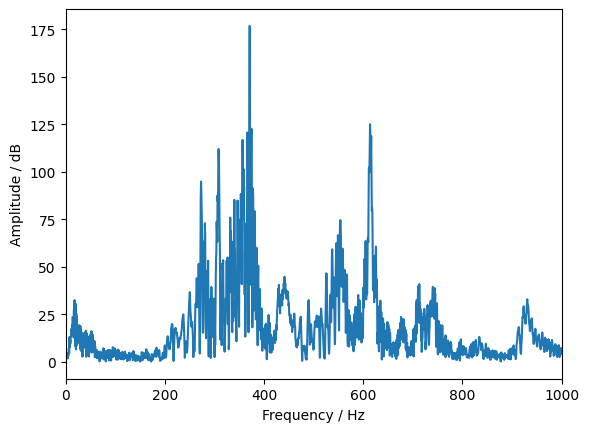

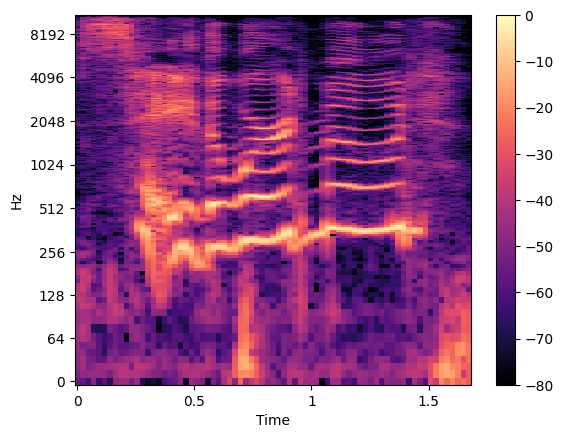

In [57]:
# Display graphs for each of the audio files displayed above
print("Angry:")
display_graphs(choose_random_audio("angry"))

print("Happy:")
display_graphs(choose_random_audio("happy"))

print("Sad:")
display_graphs(choose_random_audio("sad"))

print("Fear:")
display_graphs(choose_random_audio("fear"))

## Step 3: Acoustic Feature Extraction.

In [58]:
# Extract all the training audio files for each emotion and save them in a list
def extract_train(emotion):
    path = "./training_data/" + emotion
    audio_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith(".wav")]
    return(audio_files)

angry_train = extract_train("angry")
happy_train = extract_train("happy")
sad_train = extract_train("sad")
fear_train = extract_train("fear")

all_train = np.concatenate((angry_train, happy_train, sad_train, fear_train))

# Extract all the testing audio files for each emotion and save them in a list
def extract_test(emotion):
    path = "./testing_data/" + emotion
    audio_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith(".wav")]
    return(audio_files)

angry_test = extract_test("angry")
happy_test = extract_test("happy")
sad_test = extract_test("sad")
fear_test = extract_test("fear")

all_test = np.concatenate((angry_test, happy_test, sad_test, fear_test))

## Step 4: Feature Post-processing

In [59]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Function to extract all features of each audio of each emotion
def features(audio_files):
    # List to store all feature matrices of certain emotion
    matrix = []
    
    # Iterate through all the audio files
    for audio in audio_files:
        signal, sample_rate = librosa.load(audio)

        # audio feature extraction: loudness
        df_loudness = pd.DataFrame()
        S, phase = librosa.magphase(librosa.stft(signal))
        rms = librosa.feature.rms(S=S)
        df_loudness['Loudness'] = rms[0]
        
        # audio feature extraction: mel-frequency cepstral coefficients
        df_mfccs = pd.DataFrame()
        mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
        for n_mfcc in range(len(mfccs)):
            df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]

        # audio feature extraction: zero crossing rate
        df_zero_crossing_rate = pd.DataFrame()
        zcr = librosa.feature.zero_crossing_rate(y=signal)
        df_zero_crossing_rate['ZCR'] = zcr[0]

        # audio feature extraction: chroma
        df_chroma = pd.DataFrame()
        chromagram = librosa.feature.chroma_stft(y=signal, sr=sample_rate)
        for n_chroma in range(len(chromagram)):
            df_chroma['Chroma_%d'%(n_chroma+1)] = chromagram.T[n_chroma]

        # audio feature extraction: mel spectrogram
        df_mel_spectrogram = pd.DataFrame()
        mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
        for n_mel in range(len(mel_spectrogram)):
            df_mel_spectrogram['Mel_Spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]

        # combine all features
        feature_matrix = pd.concat([df_loudness, df_mfccs, df_zero_crossing_rate, df_chroma, df_mel_spectrogram], axis=1)
    
        # Create a MinMaxScaler object
        scaler = MinMaxScaler(feature_range=(-1, 1))

        # Fit the scaler to the data and transform the data
        scaled_data = scaler.fit_transform(feature_matrix)

        # Convert the scaled data back to a DataFrame
        scaled_df = pd.DataFrame(scaled_data, columns=feature_matrix.columns)

        # Print the scaled DataFrame
        #print(scaled_df)
        
        # Compute the mean of each column
        col_means = scaled_df.mean()
        
        result = col_means.to_numpy()

        matrix.append(result)
        
    return(matrix)

# print(features("angry"))

# Extract all features for each training emotion
X_train = features(all_train)

# Extract all features for each training emotion
X_test = features(all_test)

In [60]:
# Create array with training result
size_zero = np.zeros(len(angry_train))
size_one = np.ones(len(happy_train))
size_two = np.full(len(sad_train), 2)
size_three = np.full(len(fear_train), 3)

y_train = np.concatenate((size_zero, size_one, size_two, size_three))

# Create array with training result
size_zero = np.zeros(len(angry_test))
size_one = np.ones(len(happy_test))
size_two = np.full(len(sad_test), 2)
size_three = np.full(len(fear_test), 3)

y_test = np.concatenate((size_zero, size_one, size_two, size_three))

# NOTE: 
# 0 = ANGRY
# 1 = HAPPY
# 2 = SAD
# 3 = FEAR

## Step 5: Build your audio emotion recognition model.

In [61]:
# Import classifiers and metrics from sklearn
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

In [62]:
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

In [63]:
# Train ML model with training dataset using model.fit() function
svc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
# Training complete, test your model with testing dataset
y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

              precision    recall  f1-score   support

         0.0       0.66      0.90      0.76        30
         1.0       0.88      0.97      0.92        30
         2.0       0.96      0.87      0.91        30
         3.0       0.89      0.57      0.69        30

    accuracy                           0.82       120
   macro avg       0.85      0.82      0.82       120
weighted avg       0.85      0.82      0.82       120

              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83        30
         1.0       0.94      0.97      0.95        30
         2.0       0.97      1.00      0.98        30
         3.0       0.91      0.70      0.79        30

    accuracy                           0.89       120
   macro avg       0.90      0.89      0.89       120
weighted avg       0.90      0.89      0.89       120

              precision    recall  f1-score   support

         0.0       0.83      0.80      0.81        30
         1.0       0.

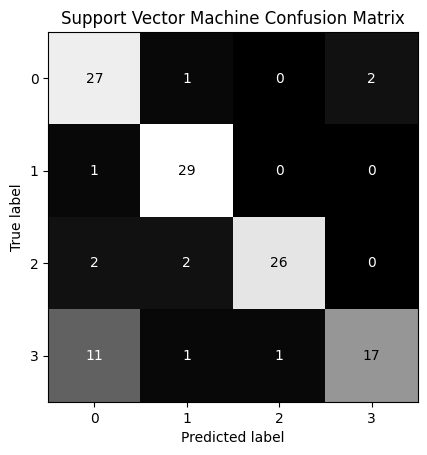

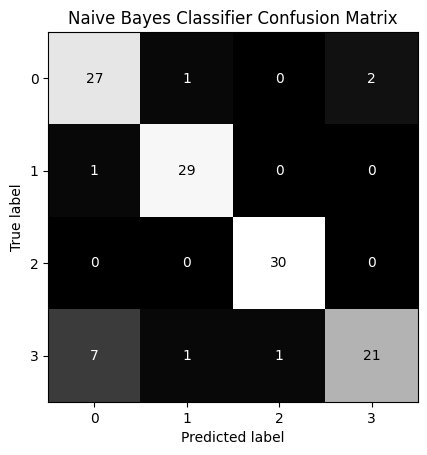

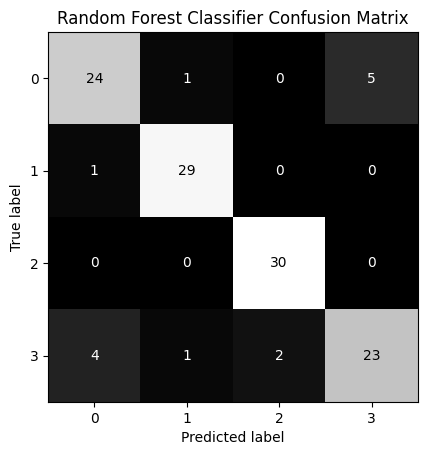

In [65]:
# Model evaluation with confusion matrix and ROC curve
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

models = ['Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")